<a href="https://colab.research.google.com/github/14-shru/NNDL_LAB-2022/blob/main/ANN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANN implemetation of XOR**

***AIM: To implement XOR GATE using ANN***

***THEORY:*** 
    *Implementing logic gates using neural networks help understand the mathematical computation by which a neural network processes its inputs to arrive at a certain output. This neural network will deal with the XOR logic problem. An XOR (exclusive OR gate) is a digital logic gate that gives a true output only when both its inputs differ from each other. The truth table for an XOR gate is shown below:* 
    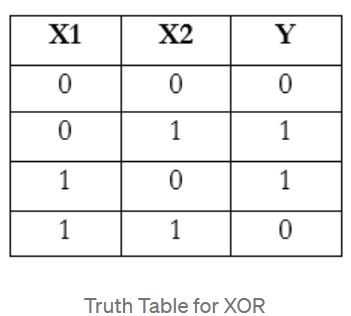

  *The goal of the neural network is to classify the input patterns according to the above truth table. If the input patterns are plotted according to their outputs, it is seen that these points are not linearly separable. Hence the neural network has to be modeled to separate these input patterns using decision planes.*

***IMPLEMENTATION:***

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = [[0,0,1,1],[0,1,0,1]]
X = np.array(data)

In [ ]:
result_xor = [[0,1,1,0]]

ANN MODEL IMPLEMENTATION

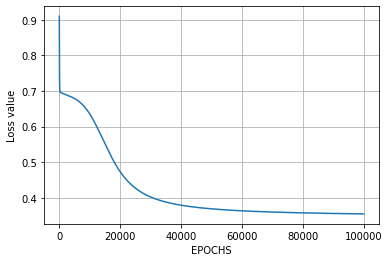

In [ ]:
Y = np.array(result_xor)

def activate(x):
    return 1/(1+np.exp(-x))
    
def intialize_params(inputfeatures , hiddenneurons , outputfeatures):
    W1=np.random.randn(hiddenneurons, inputfeatures)
    W2=np.random.randn(outputfeatures, hiddenneurons)
    b1=np.zeros((hiddenneurons,1))
    b2=np.zeros((outputfeatures,1))
    
    params = {
        "W1":W1,
        "W2":W2,
        "b1":b1,
        "b2":b2,
    }
    return params

def forward(X, Y, params):
    n = X.shape[1]
    W1 = params["W1"]
    W2 = params["W2"]
    b1 = params["b1"]
    b2 = params["b2"]
    
    Z1= np.dot(W1,X)+b1
    A1= activate(Z1)
    Z2= np.dot(W2,A1)+b2
    A2= activate(Z2)
    
    cache = (Z1,A1,W1,b1, Z2,A2,W2,b2)
    logprobs = np.multiply(np.log(A2), Y)+ np.multiply(np.log(1-A2),(1-Y))
    cost = -np.sum(logprobs)/n
    return cost, cache, A2
    
def backprop(X ,Y, cache):
    n = X.shape[1]
    (Z1,A1,W1,b1, Z2,A2,W2,b2)= cache
    
    dz2= A2-Y
    dW2= np.dot(dz2,A1.T)/n
    db2= np.sum(dz2,axis=1, keepdims=True)
    
    dA1= np.dot(W2.T, dz2)
    dz1= np.multiply(dA1, A1*(1- A1))
    
    dW1= np.dot(dz1,X.T)/n
    db1= np.sum(dz1,axis = 1,keepdims = True)/n
    
    gradient= {"dZ2": dz2, "dW2": dW2, "db2": db2,
                 "dZ1": dz1, "dW1": dW1, "db1": db1}
    return gradient
    
def update_params(params,gradient,Lr):
    params["W1"]= params["W1"]-Lr*gradient["dW1"]
    params["W2"]= params["W2"]-Lr*gradient["dW2"]
    params["b1"]= params["b1"]-Lr*gradient["db1"]
    params["b2"]= params["b2"]-Lr*gradient["db2"]
    return params

hiddenneurons = 2
inputfeatures= X.shape[0]
outputfeatures= Y.shape[0]
params = intialize_params(inputfeatures, hiddenneurons, outputfeatures)
epochs= 100000
Lr= 0.01
losses = np.zeros((epochs,1))

for i in range(epochs):
    losses[i,0], cache, A2 = forward(X,Y,params)
    gradient = backprop(X, Y,cache)
    param = update_params(params,gradient,Lr)

plt.grid(True)
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

In [ ]:
X_new = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) 
# print(X)
_, _, A2 = forward(X_new, Y, params)
print(A2)
prediction = np.zeros((A2.size))

for a in A2:
    for i in range(4):
        if(a[i]>0.5):
            prediction[i]=1.0

print(prediction)

[[0.99011683 0.50298039 0.00951482 0.49610106]]
[1. 1. 0. 0.]


In [ ]:
X = np.array([[1,1],[1,0],[0,1],[0,0]]) 
X_new = np.array([[1,0],[1,1],[0,0],[0,1]]) 
result_xor = [0,1,1,0]
Y= np.array(result_xor)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=0.00001 ,hidden_layer_sizes=(5, 4), random_state=1)
clf.fit(X, Y)
Y_pred= clf.predict(X_new)
print(Y_pred)

[1 0 0 1]


XOR MODEL 

In [ ]:
def Step_activation(x):
    if x>=0:
        return 1
    else:
        return 0

def model(x,w,b):
    o1= np.dot(x,w)+ b
    y= Step_activation(o1)
    return y

def or_model(x):
    w= np.array([1,1])
    b= -1
    # calcuated manually
    # inital bias = 1 
    # 0 , 0 
    # net = 0+0+1 = 1 but output we need is 0
    # therefore bias = -1
    # new net = 0+0-1 =-1 but due to step function -1 < 0 so it will be = 0
    # 
    # 0 , 1
    # net = 0+ 1 - 1= 0 but due to step function 0 becomes 1 as 0>=0. 
    # Which we need so no change in bias
    #
    # 1 , 1
    # net = 1+1-1.5 = 0.5 which equals 1 but we need 0 so we change bias
    # 
    # thus bias = -1
    return model(x,w,b)

test_all = np.array([[0,0],[0,1],[1,0],[1,1]])

for test in test_all:
    print("OR({}, {}) = {}".format(test[0], test[1], or_model(test)))

OR(0, 0) = 0
OR(0, 1) = 1
OR(1, 0) = 1
OR(1, 1) = 1


***CONCLUSION:***
        *We have learnt how to implenet XOR GATE using ANN in python*